In [1]:
import matplotlib.pyplot as plot
import numpy as np
import numpy.fft as fft
%matplotlib inline 

# Transformada de Fourier

La idea es usar esta libreta electrónica para calcular la transformada de Fourier y estudiar los efectos de sampleo. 

Empezamos con un ejemplo sencillo donde nosotros introducimos las frecuencias: nuestra señal es una mezcla de dos ondas senoidales con $ω_1 = 3.75$ y $ω_2 = 12.5$.

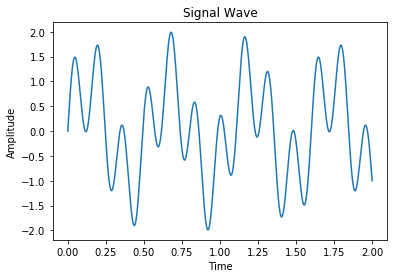

In [2]:
a = 2.0
N = 10**5

x = np.linspace(0, a, N)

fx = np.sin(3.75*2*np.pi*x / a  ) + np.sin(12.5*2*np.pi*x / a  )
plot.plot(x,fx)
plot.title('Signal Wave')
plot.xlabel('Time')
plot.ylabel('Amplitude')
plot.show()

Definimos nuestra función de transformada de Fourier. Por simplicidad, esta es una función de un argumento solamente, de modo que la dependencia en los puntos fx de nuestra función es explícita. 

In [3]:
def fxfourier(o):
    N = len(fx)
    n = np.arange(N)
    a =(2/N)*1/(2*np.pi)**(1/2)
    expfactor=a*np.exp(-2j * np.pi * o * n / N)
    return np.dot(expfactor,fx)


In [4]:
frange=range(0,200)
ω = 0.1*np.asarray(frange)
F=np.vectorize(fxfourier)
Fω=F(ω)

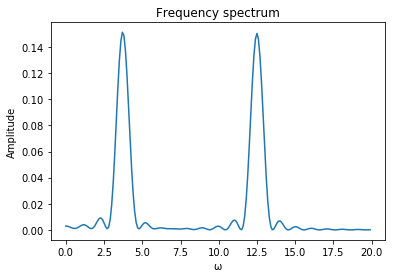

In [5]:
plot.plot(ω,np.abs(Fω)**2)
plot.title('Frequency spectrum')
plot.xlabel('ω')
plot.ylabel('Amplitude')
           
plot.show()

Ahora leemos el archivo de audio y graficamos la forma de onda. 

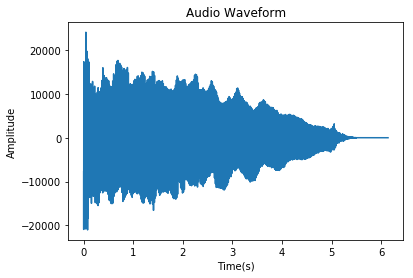

In [8]:
from scipy.io import wavfile
 
# read audio samples


input_data = wavfile.read("adist.wav")
audio = input_data[1]
samplerate = input_data[0]
times = np.arange(len(audio))/float(samplerate)


# plot the waveforme vs time
plot.plot(times, audio)
# label the axes
plot.ylabel("Amplitude")
plot.xlabel("Time(s)")
# set the title  
plot.title("Audio Waveform")
# display the plot
plot.show()

In [13]:
def audiofourier(ω):
    N = len(audio)
    n = np.arange(N)
    a =(2/N)*1/(2*np.pi)**(1/2)
    expfactor = a*np.exp(-2j * np.pi * ω * n / N)
    return np.dot(expfactor, audio)

freqrate = 1400
frange=range(400,freqrate)
ωlist = np.asarray(frange)


In [14]:
Faudio=np.vectorize(audiofourier)
Fω=Faudio(ωlist)

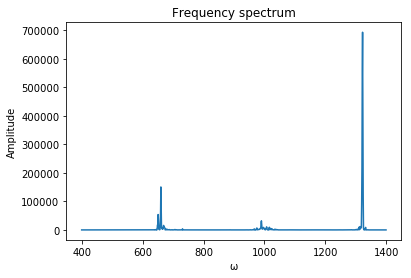

In [15]:
plot.plot(ωlist,np.abs(Fω)**2)
plot.title('Frequency spectrum')
plot.xlabel('ω')
plot.ylabel('Amplitude')
           
plot.show()

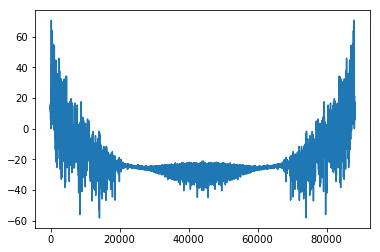

In [75]:
freqs=abs(np.fft.fft(audio))/len(audio)
freqs=freqs**2

plot.plot(10*np.log10(freqs))
plot.show()